In [0]:
import tensorflow as tf
tf.enable_eager_execution()

In [0]:
# def make_generator_model():
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))  # input_shape = (100, ) => batch
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.LeakyReLU())

#     model.add(tf.keras.layers.Reshape((7, 7, 256)))
#     assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

#     model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
#     assert model.output_shape == (None, 7, 7, 128)  
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.LeakyReLU())

#     model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
#     assert model.output_shape == (None, 14, 14, 64)    
#     model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.LeakyReLU())

#     model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
#     assert model.output_shape == (None, 28, 28, 1)

#     return model

In [0]:
# def make_discriminator_model():
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1))) #
#     model.add(tf.keras.layers.LeakyReLU())
# #     model.add(tf.keras.layers.Dropout(0.3))

#     model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
#     model.add(tf.keras.layers.LeakyReLU())
# #     model.add(tf.keras.layers.Dropout(0.3))

#     model.add(tf.keras.layers.Flatten())
# #       model.add(tf.keras.layers.Dropout(0.3))
#     model.add(tf.keras.layers.Dense(1, tf.nn.sigmoid))

#     return model

In [0]:
def make_generator_model():
  with tf.variable_scope("Generator") and tf.device('/device:GPU:0'):
      inputs = tf.keras.layers.Input(shape=(784, ))

      first = tf.keras.layers.Dense(7*7*128)(inputs)
#       first = tf.keras.layers.BatchNormalization()(first)
#       first = tf.keras.layers.LeakyReLU()(first)

      second = tf.keras.layers.Reshape((7, 7, 128))(first)
#       second = tf.keras.layers.BatchNormalization()(second)
#       second = tf.keras.layers.LeakyReLU()(second)

      third = tf.keras.layers.Conv2DTranspose(64, kernel_size = (5, 5), strides=(2, 2), padding='same', activation=tf.nn.relu)(second)
#       third = tf.keras.layers.BatchNormalization()(third)
#       third = tf.keras.layers.LeakyReLU()(third)

      forth = tf.keras.layers.Conv2DTranspose(32, kernel_size = (5, 5), strides=(2, 2), padding='same', activation=tf.nn.relu)(third)
      gen_images = tf.keras.layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(1, 1), padding='same', activation=tf.nn.sigmoid)(forth)
    
  return tf.keras.Model(inputs = inputs, outputs = gen_images)

In [0]:
def make_discriminator_model():
  with tf.variable_scope("Discriminator") and tf.device('/device:GPU:0'):
      inputs = tf.keras.layers.Input(shape = (28, 28, 1))

      first = tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation=tf.nn.relu)(inputs)
#       first = tf.keras.layers.Dropout(0.4)(first)

      second = tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation=tf.nn.relu)(first)
#       second = tf.keras.layers.Dropout(0.4)(second)

      third = tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', activation=None)(second)
#       third = tf.keras.layers.Dropout(0.4)(third)

      forth = tf.keras.layers.Flatten()(third)
      outputs = tf.keras.layers.Dense(784)(forth)
    
  return tf.keras.Model(inputs = inputs, outputs = outputs)

In [6]:
generator = make_generator_model()
discriminator = make_discriminator_model()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 6272)              4923520   
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        51232     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         801       
Total params: 5,180,417
Trainable params: 5,180,417
Non-trainable params: 0
_________________________________________________________________


In [8]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               4918032   
Total params: 5,175,056
Trainable params: 5,175,056
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np

(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = train_images/255. # Normalize the images to [0, 1]

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype(np.float32)
test_images = test_images/255.

BUFFER_SIZE = 60000
BATCH_SIZE = 100

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

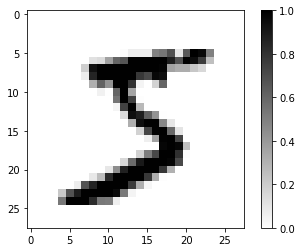

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0].reshape(28, 28), cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
def generator_loss(generated_output):
    return tf.nn.sigmoid_cross_entropy_with_logits(labels = tf.ones_like(generated_output), logits = generated_output)


def discriminator_loss(real_output, generated_output):
    # [1,1,...,1] with real output since it is true and we want our generated examples to look like it
    real_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(real_output), logits=real_output)

    # [0,0,...,0] with generated images since they are fake
    generated_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(generated_output), logits=generated_output)

#     print(real_loss.shape, generated_loss.shape)
    total_loss = real_loss + generated_loss

    return total_loss

In [0]:
# def generator_loss(generated_output):
#   return tf.reduce_mean(tf.log(generated_output))

# def discriminator_loss(real_output, generated_output):
#   return tf.reduce_mean(tf.log(real_output) + tf.log(1-generated_output))

In [0]:
generator_optimizer = tf.train.AdamOptimizer(1e-4)
discriminator_optimizer = tf.train.AdamOptimizer(1e-4)

In [0]:
EPOCHS = 100
noise_dim = 784
num_examples_to_generate = 20

# We'll re-use this random vector used to seed the generator so
# it will be easier to see the improvement over time.
random_vector_for_generation = tf.random.normal([num_examples_to_generate,
                                                 noise_dim])

In [0]:
def train_step(images):
   # generating noise from a normal distribution
    noise = tf.random.normal([images[0].shape[0], noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images[0], training=True)
        generated_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(generated_output)
        disc_loss = discriminator_loss(real_output, generated_output)


    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

In [0]:
import random 
sample_n = 20

def train(dataset, epochs):  
    for epoch in range(epochs):
        start = time.time()

        for images in dataset:
            (gen_loss, disc_loss) = train_step(images)
        
        print ('Time taken for epoch {} is {} sec'.format(epoch + 1,
                                                      time.time()-start))
        
        # We'll re-use this random vector used to seed the generator so
        # it will be easier to see the improvement over time.
        noise = tf.random.normal([sample_n, noise_dim])
        
        gen_images = generator(noise)
#         gen_images = tf.reshape(gen_images, (sample_n, 28, 28))

        fig, ax = plt.subplots(1, sample_n, figsize=(sample_n, 1))

        for i in range(sample_n):
          ax[i].set_axis_off()
          ax[i].imshow(np.reshape(gen_images[i], (28, 28)), cmap=plt.cm.binary)

        plt.savefig('{}.png'.format(str(epoch+1).zfill(3)), bbox_inches='tight')
        plt.show(fig)
        plt.close(fig)


In [0]:
import time
import matplotlib.pyplot as plt

In [0]:
tf.keras.utils.plot_model(generator, 'generator.png', show_shapes=True)
tf.keras.utils.plot_model(discriminator, 'discriminator.png', show_shapes=True)

Time taken for epoch 1 is 30.48102355003357 sec


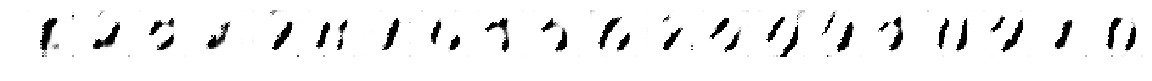

Time taken for epoch 2 is 28.881313800811768 sec


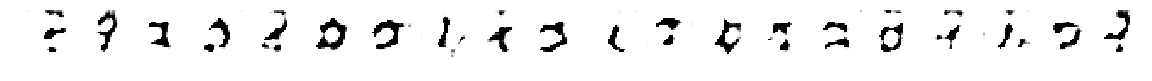

Time taken for epoch 3 is 29.0138897895813 sec


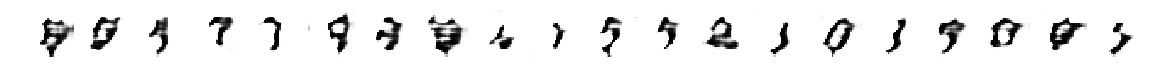

Time taken for epoch 4 is 29.003605127334595 sec


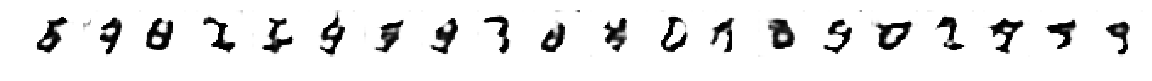

Time taken for epoch 5 is 29.10443687438965 sec


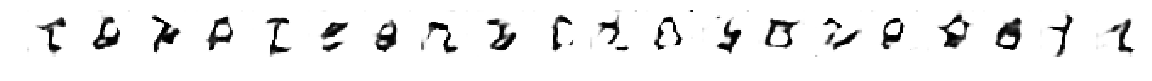

Time taken for epoch 6 is 29.285796880722046 sec


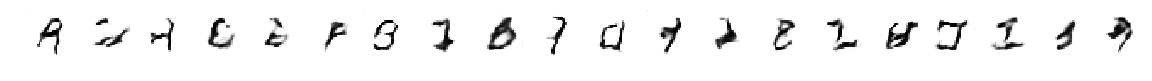

Time taken for epoch 7 is 28.99365520477295 sec


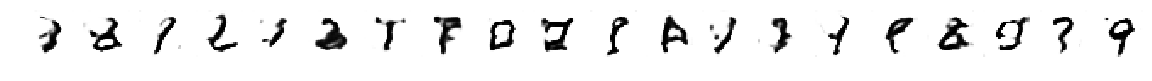

Time taken for epoch 8 is 29.421260833740234 sec


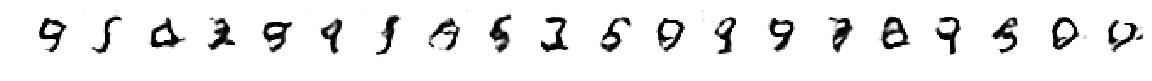

Time taken for epoch 9 is 29.055803060531616 sec


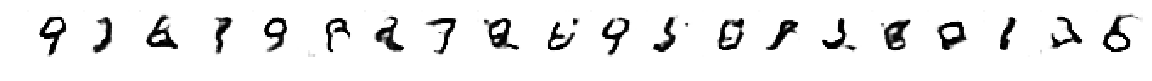

Time taken for epoch 10 is 29.213695287704468 sec


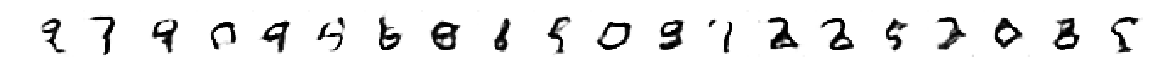

Time taken for epoch 11 is 29.224267721176147 sec


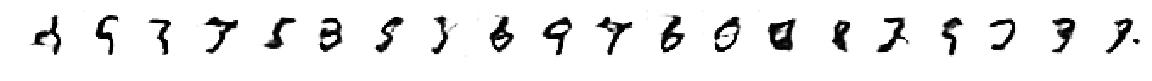

Time taken for epoch 12 is 29.030156135559082 sec


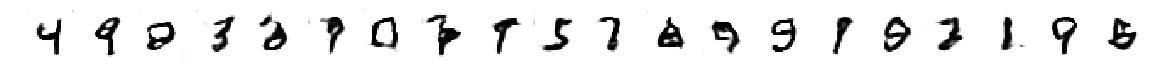

Time taken for epoch 13 is 29.08106803894043 sec


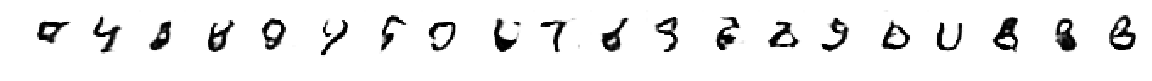

Time taken for epoch 14 is 29.406731367111206 sec


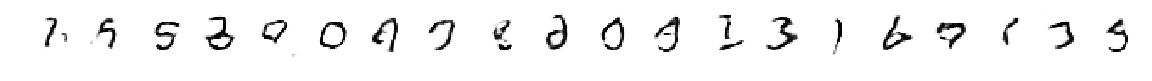

Time taken for epoch 15 is 29.024636030197144 sec


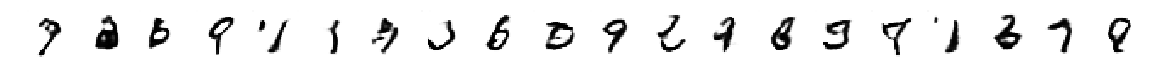

Time taken for epoch 16 is 29.350518226623535 sec


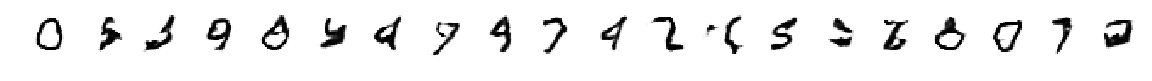

Time taken for epoch 17 is 29.07685875892639 sec


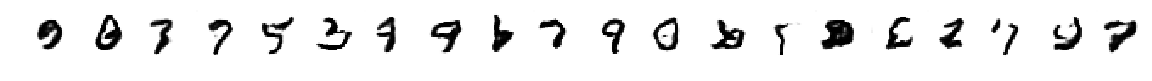

Time taken for epoch 18 is 29.70536708831787 sec


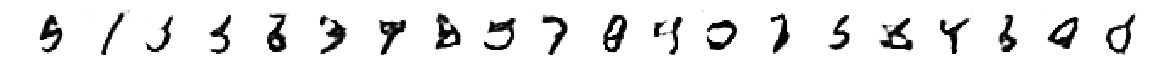

Time taken for epoch 19 is 29.394953966140747 sec


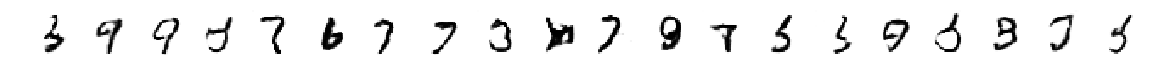

Time taken for epoch 20 is 29.35081672668457 sec


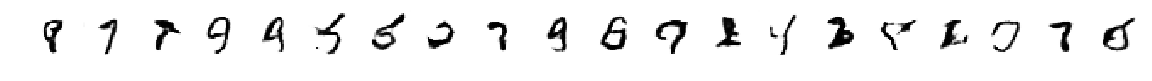

Time taken for epoch 21 is 29.068652391433716 sec


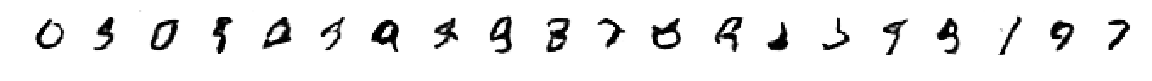

Time taken for epoch 22 is 29.12418532371521 sec


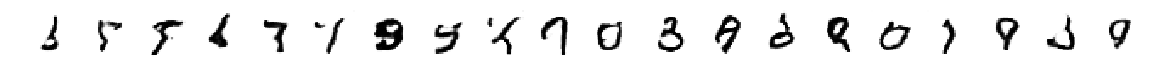

Time taken for epoch 23 is 28.952837467193604 sec


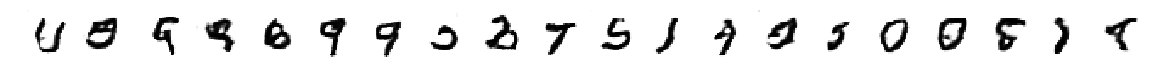

Time taken for epoch 24 is 28.998133659362793 sec


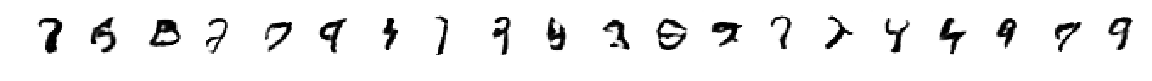

Time taken for epoch 25 is 29.290016412734985 sec


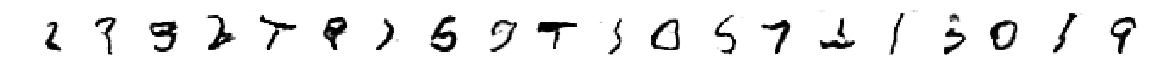

Time taken for epoch 26 is 29.04743766784668 sec


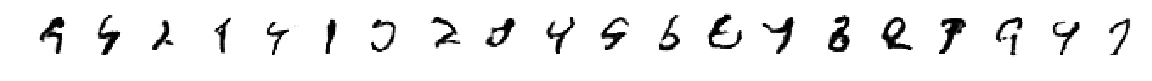

Time taken for epoch 27 is 29.36353087425232 sec


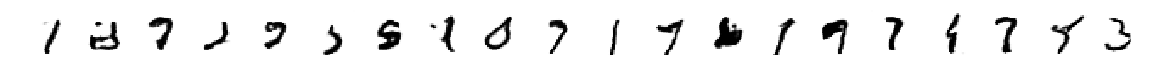

Time taken for epoch 28 is 29.622767448425293 sec


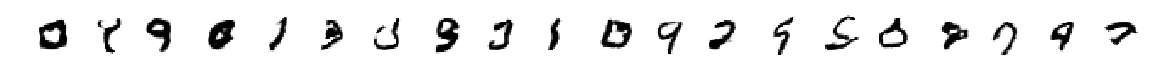

Time taken for epoch 29 is 29.44257140159607 sec


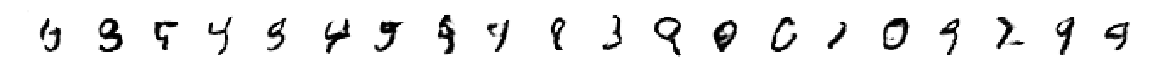

Time taken for epoch 30 is 29.013864994049072 sec


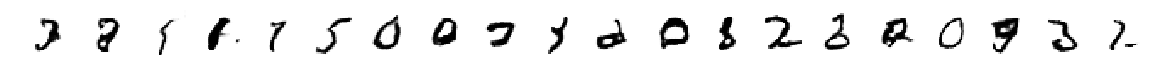

Time taken for epoch 31 is 29.332387685775757 sec


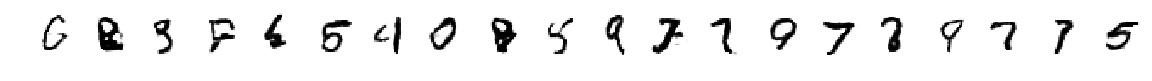

Time taken for epoch 32 is 29.118310928344727 sec


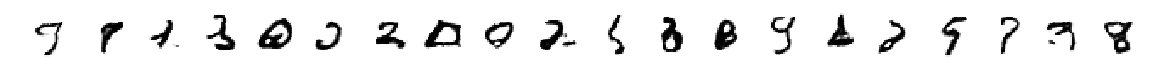

Time taken for epoch 33 is 28.9820077419281 sec


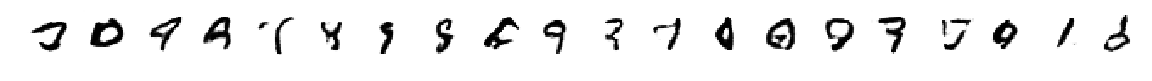

Time taken for epoch 34 is 28.9859356880188 sec


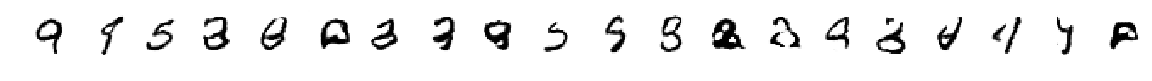

Time taken for epoch 35 is 29.049203157424927 sec


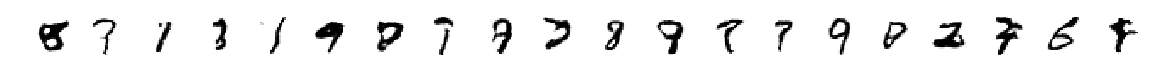

Time taken for epoch 36 is 29.21117329597473 sec


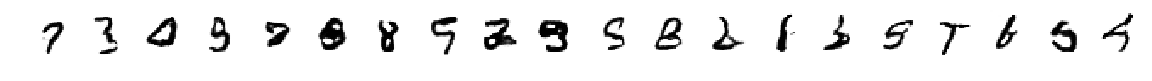

Time taken for epoch 37 is 28.92746329307556 sec


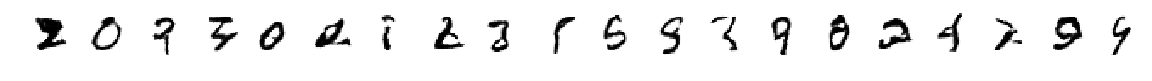

Time taken for epoch 38 is 29.42580270767212 sec


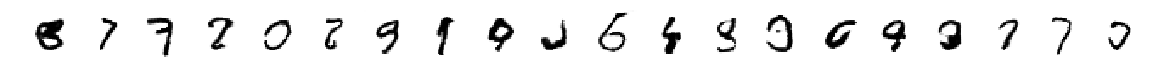

Time taken for epoch 39 is 29.500969648361206 sec


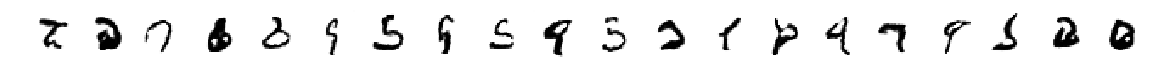

Time taken for epoch 40 is 29.399662733078003 sec


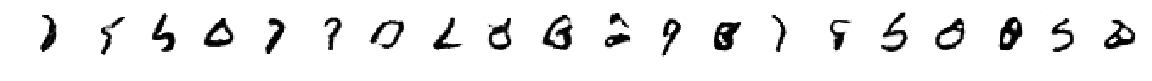

Time taken for epoch 41 is 29.007920265197754 sec


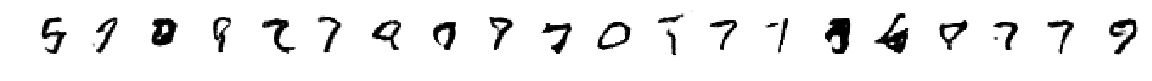

Time taken for epoch 42 is 29.20458745956421 sec


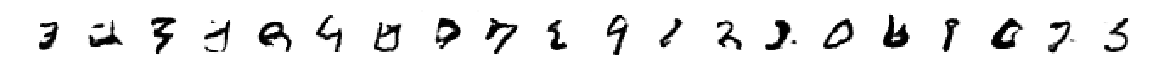

Time taken for epoch 43 is 28.97187113761902 sec


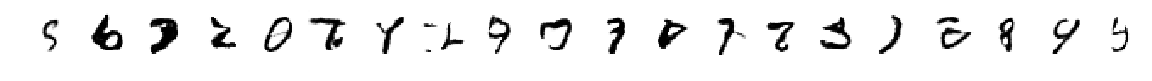

Time taken for epoch 44 is 28.915531873703003 sec


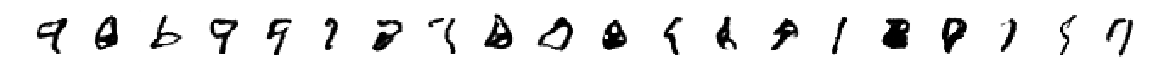

Time taken for epoch 45 is 28.920276403427124 sec


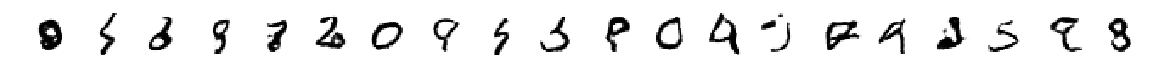

Time taken for epoch 46 is 29.041386127471924 sec


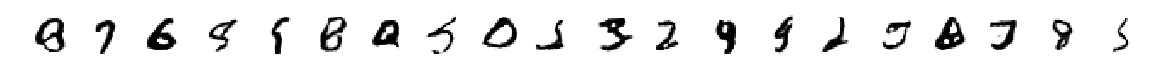

Time taken for epoch 47 is 29.31529974937439 sec


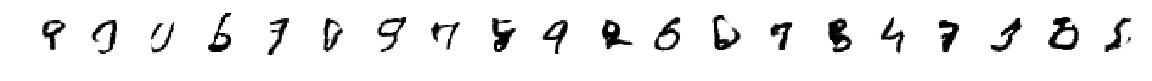

Time taken for epoch 48 is 29.155347108840942 sec


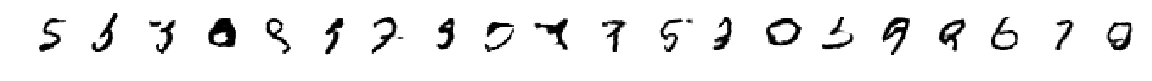

Time taken for epoch 49 is 29.566612005233765 sec


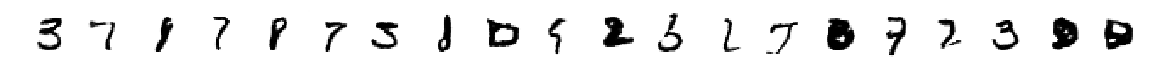

Time taken for epoch 50 is 29.203168153762817 sec


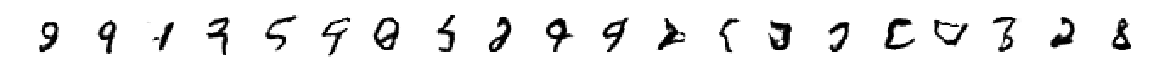

Time taken for epoch 51 is 29.304675817489624 sec


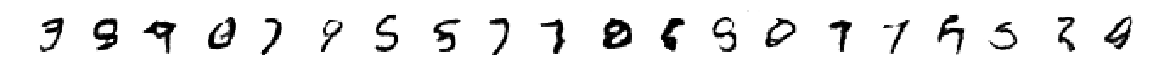

Time taken for epoch 52 is 28.88864254951477 sec


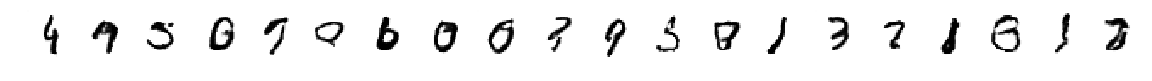

Time taken for epoch 53 is 29.203243732452393 sec


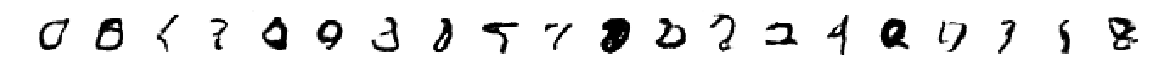

Time taken for epoch 54 is 28.898098707199097 sec


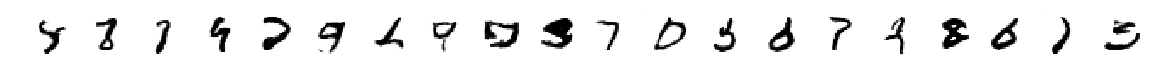

Time taken for epoch 55 is 28.90133786201477 sec


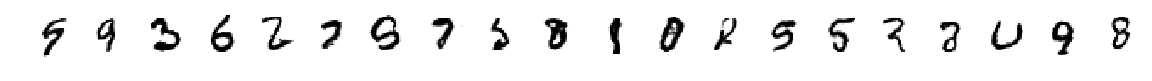

Time taken for epoch 56 is 29.00046968460083 sec


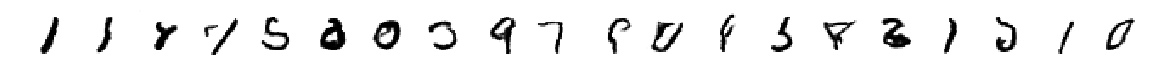

Time taken for epoch 57 is 29.219268321990967 sec


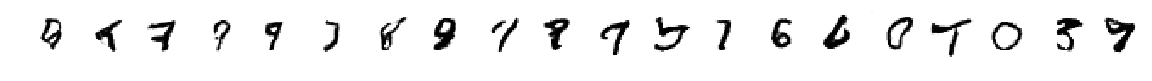

Time taken for epoch 58 is 29.29647707939148 sec


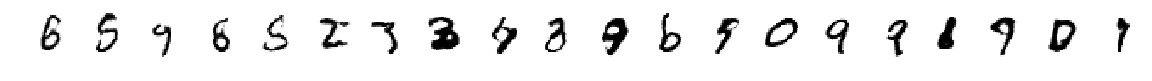

Time taken for epoch 59 is 29.258521795272827 sec


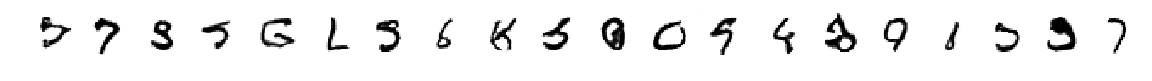

Time taken for epoch 60 is 29.186994552612305 sec


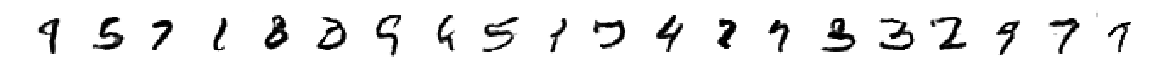

Time taken for epoch 61 is 29.213313817977905 sec


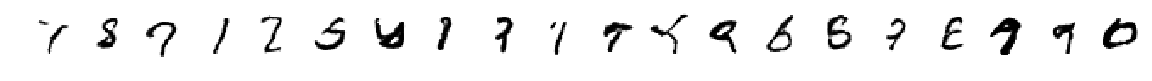

Time taken for epoch 62 is 29.27197575569153 sec


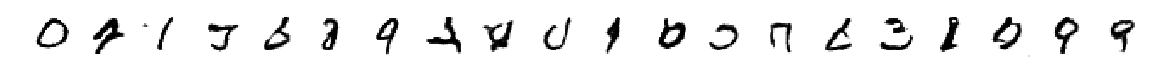

Time taken for epoch 63 is 29.701430797576904 sec


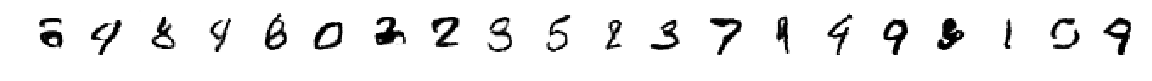

Time taken for epoch 64 is 29.54032802581787 sec


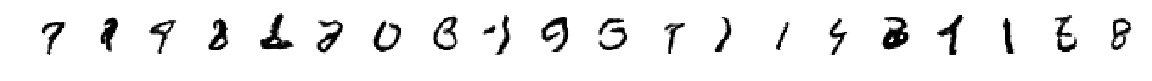

Time taken for epoch 65 is 29.388498544692993 sec


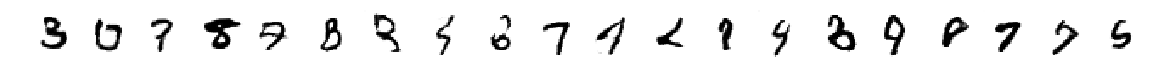

Time taken for epoch 66 is 29.615641832351685 sec


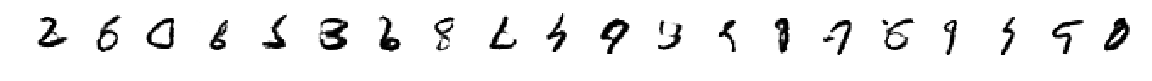

Time taken for epoch 67 is 28.979376077651978 sec


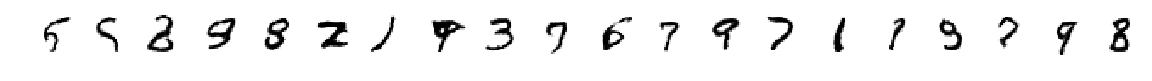

Time taken for epoch 68 is 29.263209581375122 sec


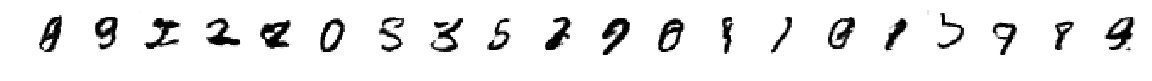

Time taken for epoch 69 is 29.607788801193237 sec


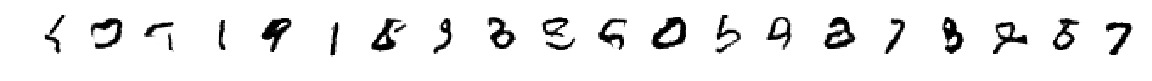

Time taken for epoch 70 is 29.021692276000977 sec


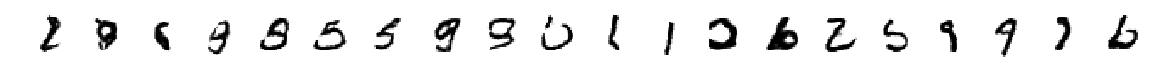

Time taken for epoch 71 is 29.26815176010132 sec


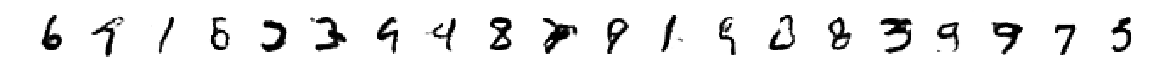

Time taken for epoch 72 is 28.99841856956482 sec


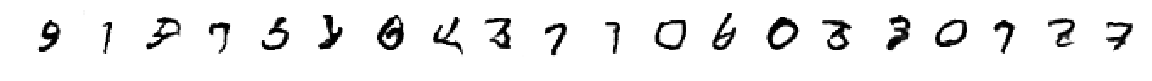

Time taken for epoch 73 is 29.203592538833618 sec


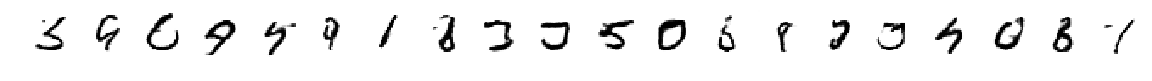

Time taken for epoch 74 is 28.915755033493042 sec


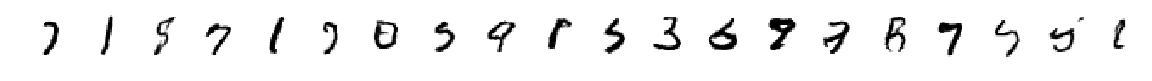

Time taken for epoch 75 is 29.28103995323181 sec


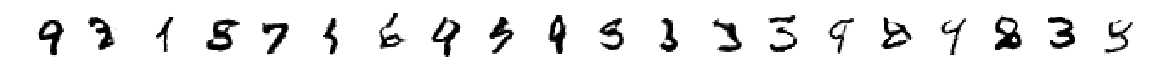

Time taken for epoch 76 is 28.99667501449585 sec


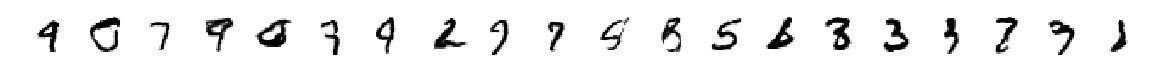

Time taken for epoch 77 is 28.9925057888031 sec


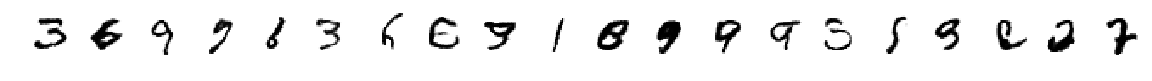

Time taken for epoch 78 is 29.002253770828247 sec


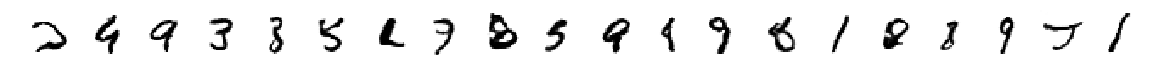

Time taken for epoch 79 is 29.009395837783813 sec


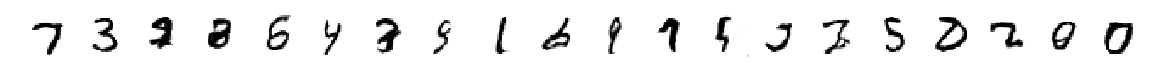

Time taken for epoch 80 is 29.479028463363647 sec


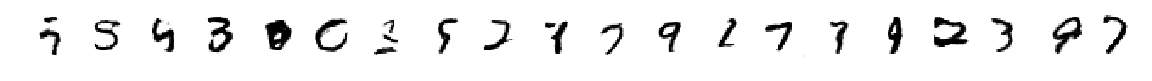

Time taken for epoch 81 is 28.9000141620636 sec


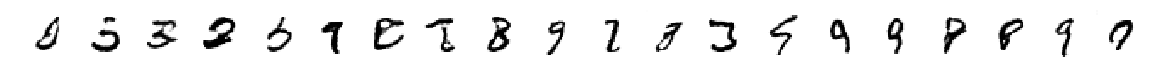

Time taken for epoch 82 is 29.209011554718018 sec


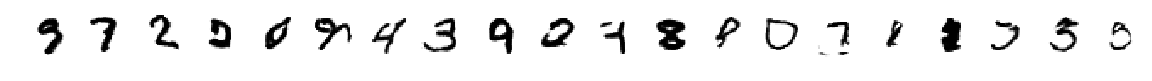

Time taken for epoch 83 is 28.9965398311615 sec


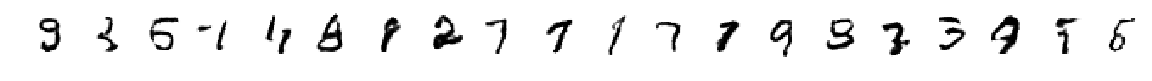

Time taken for epoch 84 is 29.195666313171387 sec


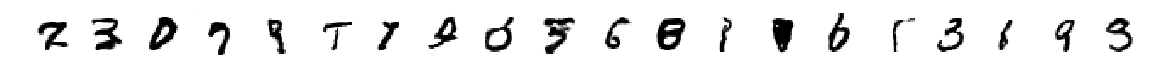

Time taken for epoch 85 is 28.976116180419922 sec


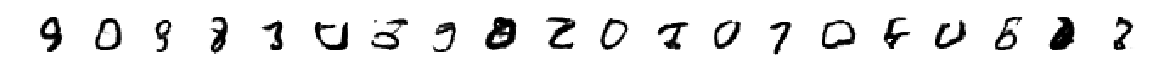

Time taken for epoch 86 is 29.187556743621826 sec


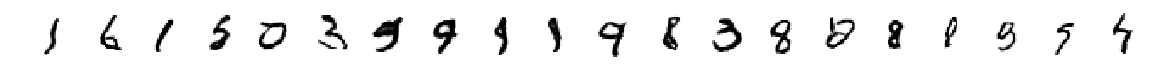

Time taken for epoch 87 is 28.926565885543823 sec


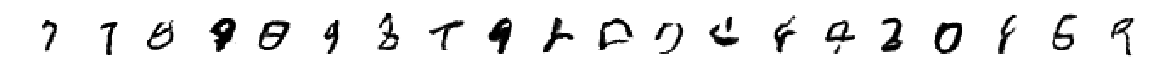

Time taken for epoch 88 is 29.020265579223633 sec


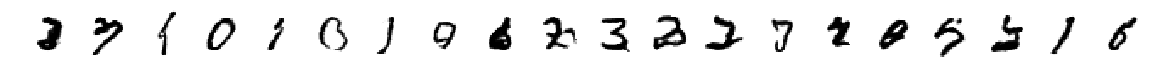

Time taken for epoch 89 is 28.87169861793518 sec


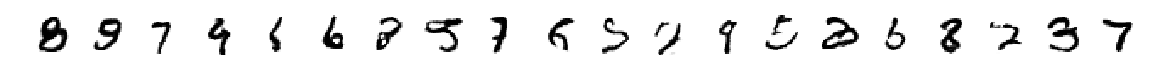

Time taken for epoch 90 is 29.453555822372437 sec


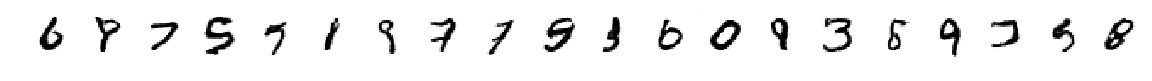

Time taken for epoch 91 is 29.21024179458618 sec


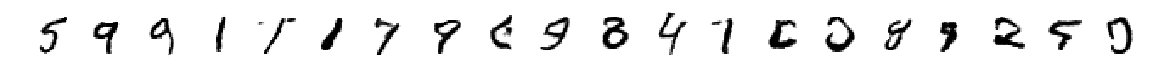

Time taken for epoch 92 is 28.913742065429688 sec


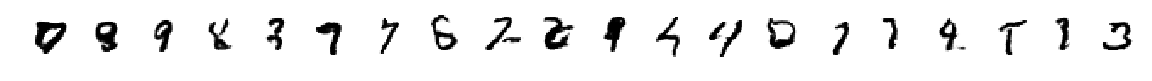

Time taken for epoch 93 is 29.242021083831787 sec


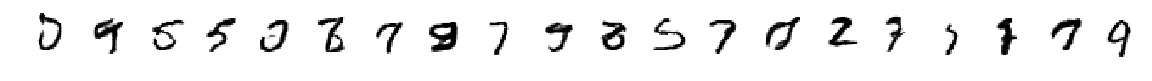

Time taken for epoch 94 is 29.168945789337158 sec


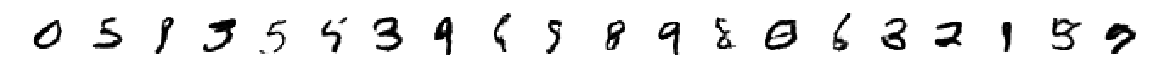

Time taken for epoch 95 is 29.21585702896118 sec


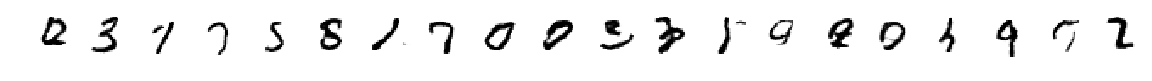

Time taken for epoch 96 is 28.909701108932495 sec


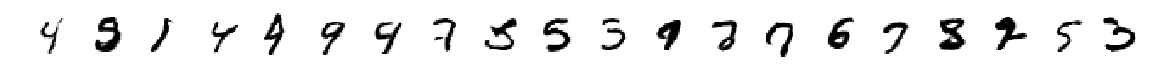

Time taken for epoch 97 is 29.13489294052124 sec


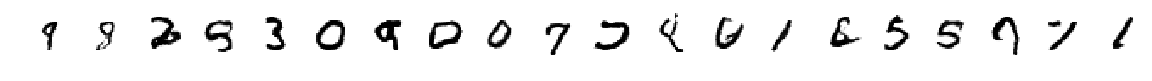

Time taken for epoch 98 is 28.953373908996582 sec


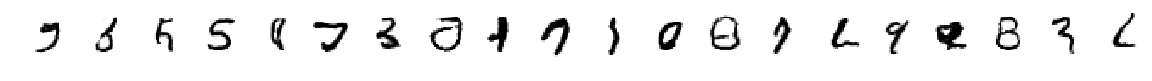

Time taken for epoch 99 is 29.01214051246643 sec


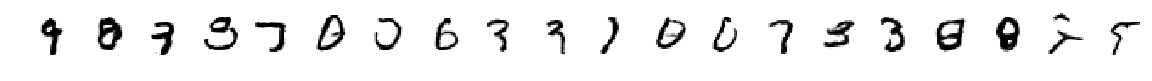

Time taken for epoch 100 is 29.177417755126953 sec


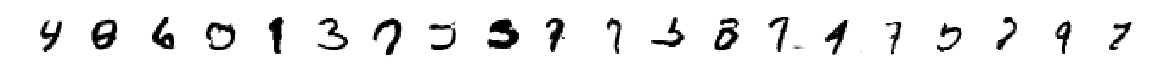

In [19]:
train(train_dataset, EPOCHS)